# An analysis of key macroeconomic indicators for Kenya and Nepal

## About the project
The _Data Warriors_ is a team of two individuals - Harison and Nirjal - from Kenya and Nepal respectively, who wanted to work on a data analysis project in the KU Hackfest. The initial idea was on assessing the impact of the Covid-19 pandemic on jobs, with reference to SDG goal 1 (No poverty) and goal 8 (decent work and economic growth). However, the motive of the project shifted to doing exploratory data analysis on employment data for the last 19 years after finding a lot of missing data for 2020, which we thought was crucial for the initial analysis.


## Exploratory data analysis

In [ ]:
import os
import urllib.request

import numpy as np
import pandas as pd

In [ ]:
DATA_DIR = "../data/"
WDI_DATA_URL = "https://media.githubusercontent.com/media/harisonmg/kenep/main/data/data.csv"

# function to download the data
def fetch_wdi_data(data_path=DATA_DIR, data_url=WDI_DATA_URL, file_name='data.csv'):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
      
    data_filepath = data_path + file_name
    if not os.path.isfile(data_filepath):
      urllib.request.urlretrieve(data_url, data_filepath)

fetch_wdi_data()

In [ ]:
wdi_data = pd.read_csv(DATA_DIR + 'data.csv')

In [ ]:
wdi_data.tail(10)

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
2863,Nepal,NPL,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,3.1,..,..,..,..,2.5,..,..,..,..,0.2,..,..,..,..,3,..,..,..,..
2864,Nepal,NPL,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,14.1,..,..,..,..,10.2,..,..,..,..,10.1,..,..,..,..,7,..,..,..,..
2865,Nepal,NPL,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,56.1,..,..,..,..,51.4,..,..,..,..,40.7,..,..,36.6,..,39.5,..,..,..,..
2866,Nepal,NPL,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,29.3,29.4,29.4,29.3,29.2,29.2,29.3,29.8,30.6,31.7,33,34.5,36.1,37.6,38.7,39.4,39.9,40.1,40,..
2867,Nepal,NPL,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,1000,1000,1000,1000,1000,500,500,500,500,500,500,500,500,200,200,200,200,200,200,..
2868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2872,Last Updated: 02/17/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data

In [ ]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   2870 non-null   object
 1   Country Code   2868 non-null   object
 2   Series Name    2868 non-null   object
 3   Series Code    2868 non-null   object
 4   2001 [YR2001]  2868 non-null   object
 5   2002 [YR2002]  2868 non-null   object
 6   2003 [YR2003]  2868 non-null   object
 7   2004 [YR2004]  2868 non-null   object
 8   2005 [YR2005]  2868 non-null   object
 9   2006 [YR2006]  2868 non-null   object
 10  2007 [YR2007]  2868 non-null   object
 11  2008 [YR2008]  2868 non-null   object
 12  2009 [YR2009]  2868 non-null   object
 13  2010 [YR2010]  2868 non-null   object
 14  2011 [YR2011]  2868 non-null   object
 15  2012 [YR2012]  2868 non-null   object
 16  2013 [YR2013]  2868 non-null   object
 17  2014 [YR2014]  2868 non-null   object
 18  2015 [YR2015]  2868 non-null

In [ ]:
# remove rows that contain metadata
wdi_data.drop(wdi_data.tail().index, inplace=True)
wdi_data.tail(2)

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
2866,Nepal,NPL,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,29.3,29.4,29.4,29.3,29.2,29.2,29.3,29.8,30.6,31.7,33,34.5,36.1,37.6,38.7,39.4,39.9,40.1,40,..
2867,Nepal,NPL,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,1000,1000,1000,1000,1000,500,500,500,500,500,500,500,500,200,200,200,200,200,200,..


In [ ]:
# drop unnnecessary columns
cols_to_drop = [col for col in wdi_data.columns if 'code' in col.lower()]
wdi_data.drop(cols_to_drop, axis=1, inplace=True)
wdi_data.columns

Index(['Country Name', 'Series Name', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [ ]:
# rename columns
import re

names = wdi_data.columns[:2].tolist()
years = [int(re.sub(r" \[\w+\]$", "", year)) for year in wdi_data.columns[2:]]

wdi_data.columns = names + years
wdi_data.columns

Index(['Country Name',  'Series Name',           2001,           2002,
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
                 2015,           2016,           2017,           2018,
                 2019,           2020],
      dtype='object')

In [ ]:
# denote missing values appropriately
wdi_data.replace('..', np.nan, inplace=True)
wdi_data.isna().sum()

Country Name       0
Series Name        0
2001            1227
2002            1223
2003            1118
2004            1162
2005            1013
2006            1030
2007            1046
2008             983
2009            1021
2010             973
2011             999
2012            1021
2013            1040
2014             824
2015             914
2016             915
2017            1093
2018            1255
2019            1468
2020            2828
dtype: int64

In [ ]:
# convert columns to appropriate data types
wdi_data[names] = wdi_data[names].astype("category")
wdi_data[years] = wdi_data[years].astype("float")
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 0 to 2867
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country Name  2868 non-null   category
 1   Series Name   2868 non-null   category
 2   2001          1641 non-null   float64 
 3   2002          1645 non-null   float64 
 4   2003          1750 non-null   float64 
 5   2004          1706 non-null   float64 
 6   2005          1855 non-null   float64 
 7   2006          1838 non-null   float64 
 8   2007          1822 non-null   float64 
 9   2008          1885 non-null   float64 
 10  2009          1847 non-null   float64 
 11  2010          1895 non-null   float64 
 12  2011          1869 non-null   float64 
 13  2012          1847 non-null   float64 
 14  2013          1828 non-null   float64 
 15  2014          2044 non-null   float64 
 16  2015          1954 non-null   float64 
 17  2016          1953 non-null   float64 
 18  2017    

There are so many missing values. But let's see what we can do with the data.

### Employment by sector

In [ ]:
sectors = ['agriculture', 'industry', 'services']
gender = ['male', 'female']

In [ ]:
# function to match column values with a string
def match_column_values(df, column, string, case=False):
  return df[df[column].str.contains(string, case=case)]

In [ ]:
# get data on employment
employment_data = match_column_values(wdi_data, 'Series Name', 'employment')
employment_data.head(2)

,Country Name,Series Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,Kenya,Adequacy of unemployment benefits and ALMP (% ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Kenya,Benefit incidence of unemployment benefits and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
employment_series_names = employment_data['Series Name'].unique().tolist()
employment_series_names[:3]

['Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
 'Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)',
 'Child employment in agriculture (% of economically active children ages 7-14)']

In [ ]:
employment_by_sector = match_column_values(employment_data, 'Series Name', ' | '.join(sectors))

# separate child employment
child_employment_idx = match_column_values(employment_by_sector, 'Series Name', 'child').index
child_employment_by_sector = employment_by_sector.loc[child_employment_idx]
employment_by_sector = employment_by_sector.drop(child_employment_idx)

In [ ]:
child_employment_by_sector.head(2)

,Country Name,Series Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
147,Kenya,Child employment in agriculture (% of economic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Kenya,Child employment in services (% of economicall...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
employment_by_sector.head(2)

,Country Name,Series Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
359,Kenya,Employment in agriculture (% of total employme...,51.50,54.279999,56.759998,58.93,61.060001,61.139999,60.970001,61.110001,60.939999,60.32,59.740002,59.220001,58.59,57.939999,57.259998,56.529999,55.860001,55.080002,54.34,NaN
362,Kenya,Employment in industry (% of total employment)...,10.19,9.050000,8.090000,7.34,6.700000,6.460000,6.290000,6.130000,6.040000,6.01,6.010000,6.010000,6.03,6.060000,6.090000,6.130000,6.160000,6.190000,6.22,NaN


In [ ]:
employment_by_sector.isna().sum()

Country Name     0
Series Name      0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020            10
dtype: int64

In [ ]:
agriculture = match_column_values(employment_by_sector, 'Series Name', 'agriculture')
industry = match_column_values(employment_by_sector, 'Series Name', 'industry')
services = match_column_values(employment_by_sector, 'Series Name', 'services')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["figure.figsize"] = (14,8)

## Insights

### 1. Annual employment rate
The graphs below represents the comparison between Employment Rates per year for two countries: Kenya and Nepal. It illustrates how the employment data for these countries have changed over the year. The vertical axis shows the Industry Based Employment Rate. And the horizontal axis represents the total span of years from 2001 to 2019. There graph illustrates the comparison of two datasets: Kenya and Nepal. The blue dots depict the graph for Kenya, and the orange dots represent Nepal. 

#### a) In the agriculture sector

Text(0, 0.5, 'Employment Rate')

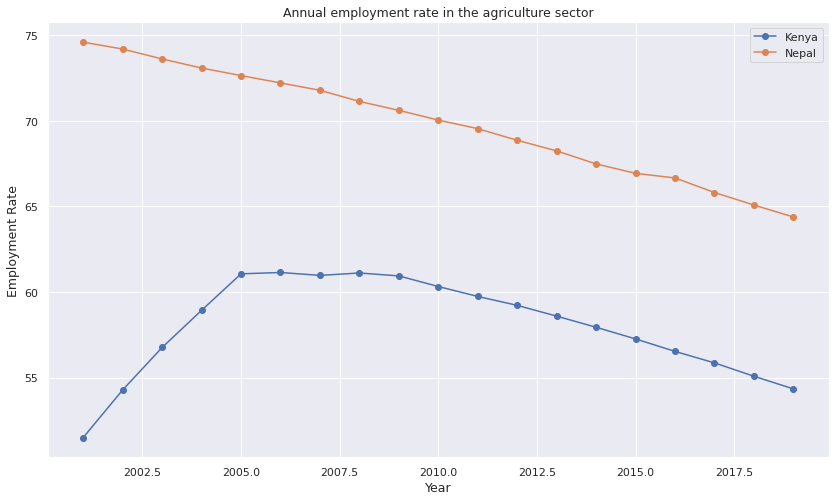

In [ ]:
agriculture_employment = agriculture.T.reset_index().drop([0,1]).set_index('index').dropna()
agriculture_employment.columns = ['Kenya', 'Nepal']
agriculture_employment.plot(marker = 'o')
plt.title('Annual employment rate in the agriculture sector', fontsize = 12.5)
plt.xlabel('Year', fontsize = 12.5)
plt.ylabel('Employment Rate', fontsize = 12.5)

It can be seen that over the span of 19 years, there's a *steady fall* in agricultural employment rate for Nepal. For instance, the rate decreased by **10.21** percentage points from *74.59* to *64.38* percent. Whereas, for Kenya, there's a *gradual increase* till the year 2005 - it had risen by **9.56** percentage points reaching *61.06* from an initial *51.50* percent. It fluctuated around the same range for a few years until 2010. Then, it started to *steadily decline* with an fall of **5.98** percentage points for the past 9 years reaching *54.34* from *60.32* percent. 

#### b) In the industry sector





Text(0, 0.5, 'Employment Rate')

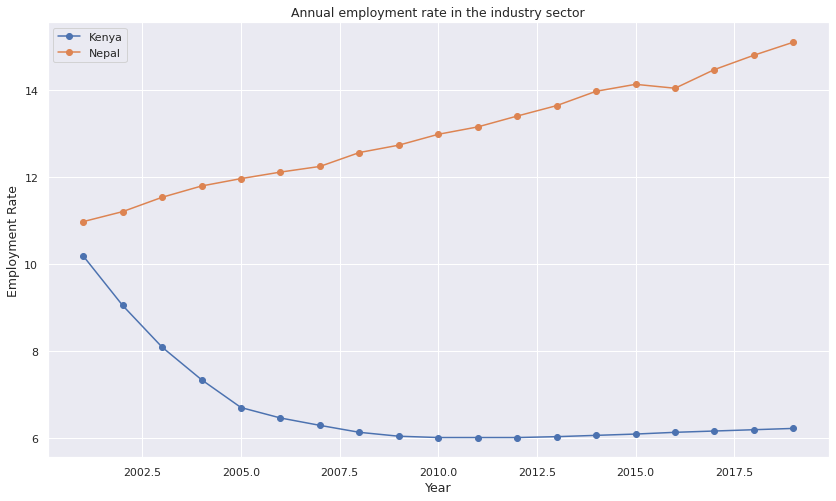

In [ ]:
industry_employment = industry.T.reset_index().drop([0,1]).set_index('index').dropna()
industry_employment.columns = ['Kenya', 'Nepal']
industry_employment.plot(marker = 'o')
plt.title('Annual employment rate in the industry sector', fontsize = 12.5)
plt.xlabel('Year', fontsize = 12.5)
plt.ylabel('Employment Rate', fontsize = 12.5)

If we look over time, we can see that there's a *steady increase* in industrial employment rate for Nepal. For instance, over 19 years, the rate increased by **4.13** percentage points from *10.98* to *15.11*. Whereas, for Kenya, there's a *gradual exponential decline* till the year 2012 - it has decreased by **4.18** percentage points reaching *6.01* from *10.09*. But after that it's slowly starting to climb with an increase of **0.21** percentage points for the past 8 years ending up at *6.22*. 

#### c) In the service sector

Text(0, 0.5, 'Employment Rate')

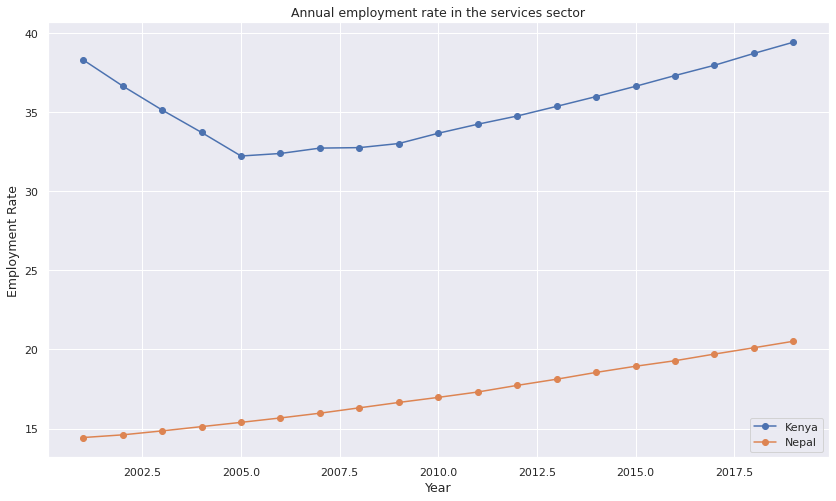

In [184]:
services_total_employment = match_column_values(services, 'Series Name', 'total')
services_total_employment = services_total_employment.T.reset_index().drop([0,1]).set_index('index').dropna()
services_total_employment.columns = ['Kenya', 'Nepal']
services_total_employment.plot(marker = 'o')
plt.title('Annual employment rate in the services sector', fontsize = 12.5)
plt.xlabel('Year', fontsize = 12.5)
plt.ylabel('Employment Rate', fontsize = 12.5)

If we look over time, we can see that there's a *slow increase* in services employment rate for **Nepal**. Over 19 years, the rate increased by **6.09** percentage points from *14.43* to *14.43*. Whereas, for **Kenya**, there was a *sharp decline* till the year 2005 - it decreased by **6.08** percentage points reaching *32.24* from *32.24*. But after that it's slowly started climbing with an increase of **7.2** percentage points for the past 14 years ending up at *39.44*. 

Text(0, 0.5, 'Employment Rate')

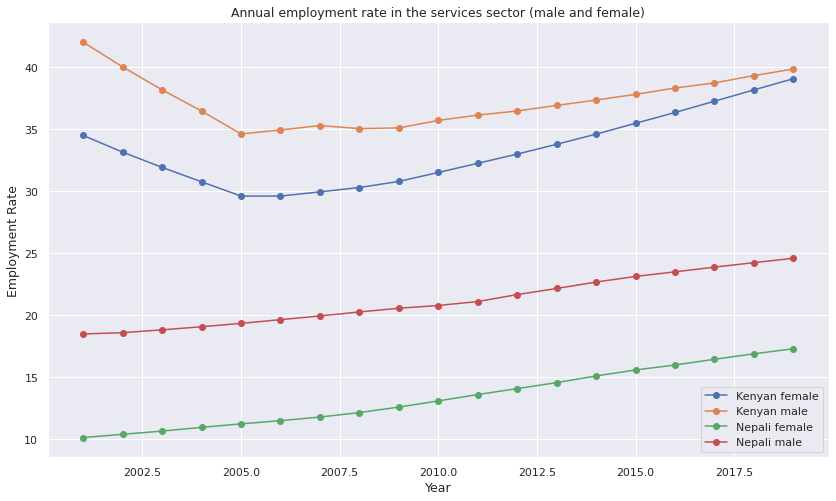

In [183]:
services_employment_by_gender = match_column_values(services, 'Series Name', 'male')
services_employment_by_gender = services_employment_by_gender.T.reset_index().drop([0,1]).set_index('index').dropna()
services_employment_by_gender.columns = ['Kenyan female', 'Kenyan male', 'Nepali female', 'Nepali male']
services_employment_by_gender.plot(marker = 'o')
plt.title('Annual employment rate in the services sector (male and female)', fontsize = 12.5)
plt.xlabel('Year', fontsize = 12.5)
plt.ylabel('Employment Rate', fontsize = 12.5)

The graph above represents a collective data for **Kenya** and **Nepal**'s annual employment rate in the services sector for both male and female. 
For **Nepal**, we can see that for both, there is a *slow increase* in the services employment rate. For females, the rate increased by **7.15** percentage points from *10.15* to *17.3*. And the rate for males increased by **6.09** reaching *24.58* from *18.49*. However, we can still see a disparity between the line graphs for males and females, although they're both increasing.  
Whereas, if we were to look into **Kenya**, the difference in employment rate for services is not as big. For both males and females, the rate steadily decreased by **7.31** and **4.88** percentage points respectively. However, after that, the rate started *slowly climbing* for males ending up at *39.82* with and increase of **5.23** percentage points. For females, the rate steadily increased by **9.45** percentage points reaching *39.04* in over 14 years. 